2021-12-18

# The Monty Hall Problem

The [Monty Hall Problem](https://en.wikipedia.org/wiki/Monty_Hall_problem) is a potentially unintuitive probability puzzle:

> Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?

While I've _known_ the answer to the problem for a number of years, I still don't have an intuition for it.  I'm just starting to seriously learn Python and I thought modeling the problem would be an excellent opportunity to start using Python notebooks.

The notes in this and other notebooks will include both a discussion of the problem at hand and the structure of the code.  I am not confident about either, so these documents should be seen as a series of research notes, rather than statements of fact.

In [38]:
import matplotlib.pyplot as plt
import random

Here's my initial modeling of the problem.  My initial intuition for how to structure answering the problem is to build a function that runs a single monty hall scenario, with a parameter of whether the contestant switches their choice.  Then I'd like to run a set of simulations and show the results.

In [39]:
def monty_hall(switch=True):
    # We set the door with the prize as True ahead of time.
    doors = [False, False, True]
    random.shuffle(doors)
    choices = { i:doors[i] for i in range(3) }

    # Our contestant picks a random choice
    contestant_choice_1_result = choices.pop(random.choice(list(choices.keys())))

    # Monty Hall picks one of the doors we didn't pick that's false, and reveals it.
    # This is the thing that throws people.  Monty Hall would never reveal a door
    # that's true.  What's the fun in that?  But because he's only going to pick a
    # door without a prize, that changes the odds for the switch.
    choices.pop({v: k for k, v in choices.items()}[False])

    if switch:
        return list(choices.values())[0]
    else:
        return contestant_choice_1_result

We now simulate 1 million runs switching, and 1 million not switching, to see the results we get.

I'm pretty sure there's a better or more pythonic way of handling this, but using the list comprehensions is about as much python as I've got the brain capacity for at the moment.

In [40]:
sim_count = 1_000_000

simulations_switching = [monty_hall() for _ in range(sim_count)]
simulations_not_switching = [monty_hall(switch=False) for _ in range(sim_count)]

successes_switching = len([sims for sims in simulations_switching if sims])
successes_not_switching = len([sims for sims in simulations_not_switching if sims])

print(f"Switching Successes: {100*successes_switching/sim_count}% ({successes_switching}/{sim_count})")
print(f"Not Switching Successes: {100*successes_not_switching/sim_count}% ({successes_not_switching}/{sim_count})")

Switching Successes: 66.6825% (666825/1000000)
Not Switching Successes: 33.2882% (332882/1000000)


Wow!  That looks like the result we'd expect.  Even when I was running 1,000 iterations, this was the same result.

So I guess if you're going to be competing in a Monty Hall problem 1,000 times, you should _definitely_ switch.  However, it can sometimes pay off to [not do that](https://www.distractify.com/p/monty-hall-problem-explained-survivor).

[666825, 332882]

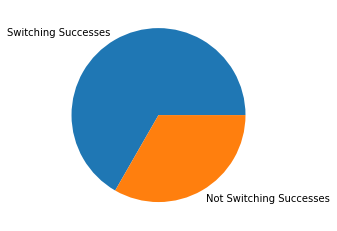

In [46]:
successes = [successes_switching, successes_not_switching]
plt.pie(successes, labels=['Switching Successes', 'Not Switching Successes'])
successes